# Karte der HACI-Startpunkte für 2008 bis 2017

Für das Poster zur ECSS 2019 in Krakau.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from standard_config import *

from io_tools import radolan
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('pdf', fonttype=42)

In [2]:
haci_objects = pd.read_csv("{}/HACI_bbox_data/haci_objects_filtered.csv".format(local_data_path))
haci_objects = haci_objects.assign(date=pd.to_datetime(haci_objects['date'].astype(str) + 'T' + haci_objects['time'],utc=True))

haci_objects_2013 = haci_objects[(haci_objects.date >= pd.to_datetime("2013-01-01T0000",utc=True)) & 
                                 (haci_objects.date <= pd.to_datetime("2013-12-31T2359",utc=True))]

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname T identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [3]:
haci_cases_classified = pd.read_csv("{}/2019-01_trackingstudie/HACI_cases_manually_classified.csv".format(proj_path))

In [4]:
haci_cases_classified.head()

,case_id,Klasse
0,20130318_634,3
1,20130412_1661,2
2,20130412_1683,2
3,20130416_1277,2
4,20130418_924,2


In [5]:
#isolated_objects = pd.read_csv("{}/2019-01_trackingstudie/data/isolated_tracks_2008-2017.csv".format(proj_path))

In [6]:
date = [int(row.case_id.split("_")[0]) for i, row in haci_cases_classified.iterrows()]

In [7]:
ids = [int(row.case_id.split("_")[1]) for i, row in haci_cases_classified.iterrows()]

In [8]:
interesting_cases = []

for i in range(len(date)):
    new_dic = dict()
    
    selection = haci_objects_2013[(haci_objects_2013.dstring==int(date[i]))& (haci_objects_2013.id==int(ids[i]))]
    
    new_dic.update(selection)
    
    interesting_cases.append(new_dic)

In [9]:
interesting_cases = pd.DataFrame(interesting_cases)

In [10]:
case_ids = []

for i in range(len(date)):
    cid = "{}_{}".format(date[i],ids[i])
    case_ids.append(cid)

In [11]:
interesting_cases = interesting_cases.assign(case_id = case_ids)

In [12]:
interesting_cases = interesting_cases.assign(case_class = haci_cases_classified['Klasse'].values)

In [13]:
interesting_cases.to_csv("/vols/satellite/home/lenk/proj/2019-01_trackingstudie/data/haci_cases_2013.csv",index=False)

In [14]:
m = Basemap(resolution='i',projection='stere',\
            lat_ts=60,lat_0=90,lon_0=10,
            llcrnrlon=3,llcrnrlat=47,urcrnrlon=16,urcrnrlat=55)

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
r = radolan.Radolan()

In [16]:
lons = []
lats = []

for i, row in interesting_cases.iterrows():
    lo = r.lon[row.l0.iloc[0],row.c0.iloc[0]]
    la = r.lat[row.l0.iloc[0],row.c0.iloc[0]]
    
    lons.append(lo)
    lats.append(la)

In [17]:
x,y = m(lons,lats)

In [18]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==1:
            cols.append('#00ff0000')
        elif l==2:
            cols.append('#0000ff00')
        elif l==3:
            cols.append('#ff000000')
        else:
            cols.append('#ffa50000')
    return cols

def pltmarker(lst):
    markers=[]
    for l in lst:
        if l==1:
            markers.append('o')
        elif l==2:
            markers.append('v')
        elif l==3:
            markers.append('s')
        else:
            markers.append('X')
    return markers

In [19]:
cols = pltcolor(interesting_cases.case_class.values.tolist())
marks = pltmarker(interesting_cases.case_class.values.tolist())

In [20]:
interesting_cases.case_class.values

array([3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2,
       2, 2, 3, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 4,
       4, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2,
       3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2,
       3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 3, 4, 2, 2, 4, 3, 3, 4, 3, 3, 3, 3, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       3, 2, 4, 3, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4,
       2, 2, 4, 3, 3, 4, 2, 3, 4, 4, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3,
       2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [21]:
import seaborn as sns
sns.set_context("talk")
from matplotlib.lines import Line2D

In [22]:
classes = {1:'isolated',2:'cloud field',3:'below clouds',4:'close to ex.'}
colours = {1:'green',2:'blue',3:'red',4:'orange'}
markers = {1:'o',2:'v',3:'s',4:'X'}

In [23]:
legend_elements = [Line2D([0], [0], color='g', lw=0, label='isolated',marker='o'),
                   Line2D([0], [0], marker='v', color='b', label='cloud field',lw=0),
                   Line2D([0],[0], color='red',lw=0,label='below clouds',marker='s'),
                   Line2D([0],[0], color='orange',lw=0,label='close to ex.',marker='X')]

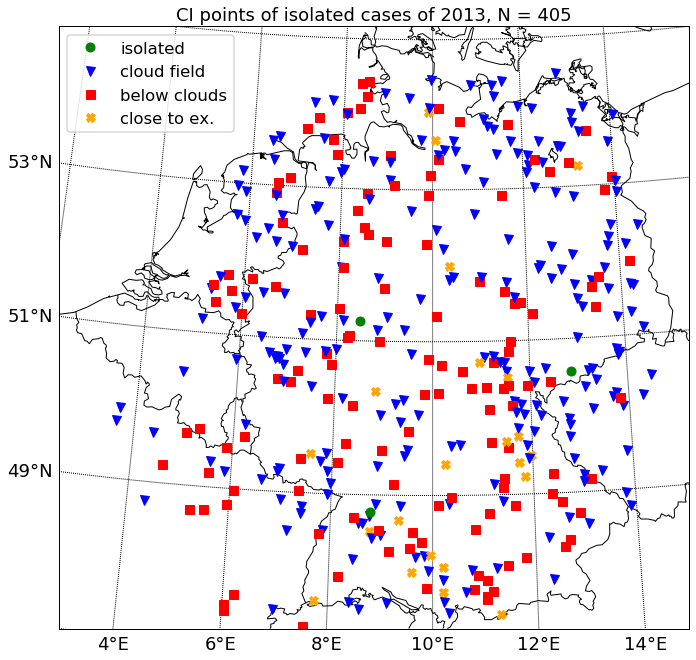

In [27]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.sca(ax)

#m.shadedrelief()
#m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='white',lake_color='white')
m.drawcoastlines()
m.drawcountries(linewidth=1)
m.drawmeridians(np.arange(2,18,2),labels=[False,False,False,True])
m.drawparallels(np.arange(45,56,2),labels=[True,False,False,False])

for i, row in interesting_cases.iterrows():
    lo = r.lon[row.l0.iloc[0],row.c0.iloc[0]]
    la = r.lat[row.l0.iloc[0],row.c0.iloc[0]]
    
    klasse = row.case_class
    
    x,y = m(lo,la)
    m.plot(x,y,color=colours[klasse],marker=markers[klasse])
    
#plt.legend(loc='upper left')
ax.legend(handles=legend_elements, loc='upper left')
ax.set_title("CI points of isolated cases of 2013, N = 405")
plt.tight_layout()
plt.savefig("/vols/satellite/home/lenk/proj/2019-01_trackingstudie/pics/ci_karte.pdf")
plt.show()

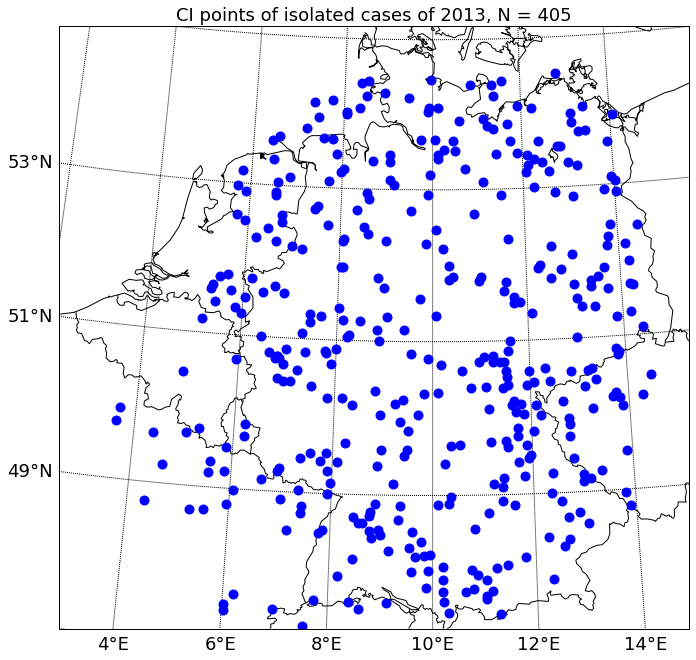

In [28]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.sca(ax)

#m.shadedrelief()
#m.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose= True)
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='white',lake_color='white')
m.drawcoastlines()
m.drawcountries(linewidth=1)
m.drawmeridians(np.arange(2,18,2),labels=[False,False,False,True])
m.drawparallels(np.arange(45,56,2),labels=[True,False,False,False])

for i, row in interesting_cases.iterrows():
    lo = r.lon[row.l0.iloc[0],row.c0.iloc[0]]
    la = r.lat[row.l0.iloc[0],row.c0.iloc[0]]
    
    klasse = row.case_class
    
    x,y = m(lo,la)
    m.plot(x,y,color='b',marker='o')
    
#plt.legend(loc='upper left')
#ax.legend(handles=legend_elements, loc='upper left')
ax.set_title("CI points of isolated cases of 2013, N = 405")
plt.tight_layout()
plt.savefig("/vols/satellite/home/lenk/proj/2019-01_trackingstudie/pics/ci_karte2.pdf")
plt.show()